# DS Project

## Import Datasets and Library Packages

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import datetime as dt
from datetime import datetime

In [2]:
df=pd.read_csv('data.csv')
df2017=pd.read_csv('featuresdf.csv')
df2018=pd.read_csv('top2018.csv')

## Data Cleaning and Processing 

In [3]:
df.columns = (df.columns.str.lower()
                .str.replace(' ', '_'))
df.drop('url',axis=1,inplace=True)

In [4]:
df.head()

,position,track_name,artist,streams,date,region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec
1,2,Chantaje,Shakira,19270,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,2017-01-01,ec
4,5,Safari,J Balvin,14269,2017-01-01,ec


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441197 entries, 0 to 3441196
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   position    int64 
 1   track_name  object
 2   artist      object
 3   streams     int64 
 4   date        object
 5   region      object
dtypes: int64(2), object(4)
memory usage: 157.5+ MB


In [6]:
df['date']=pd.to_datetime(df['date'])
df1=df.rename(columns={'track_name':'name'})
df1.head()

,position,name,artist,streams,date,region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec
1,2,Chantaje,Shakira,19270,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,2017-01-01,ec
4,5,Safari,J Balvin,14269,2017-01-01,ec


In [7]:
print(df2017.shape)
df2017.drop('id',axis=1,inplace=True)
df2017.rename(columns={'artists':'artist'},inplace=True)
df2017.head()

(100, 16)


,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [8]:
print(df2018.shape)
df2018.drop('id',axis=1,inplace=True)
df2018.rename(columns={'artists':'artist'},inplace=True)
df2018.head()

(100, 16)


,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [9]:
df1.isnull().sum()

position      0
name        657
artist      657
streams       0
date          0
region        0
dtype: int64

**Checking if rows of records missing names also mising artist name**

In [10]:
(df1['name'].isnull()==df1['artist'].isnull()).any()

True

In [11]:
df1.dropna(inplace=True)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3440540 entries, 0 to 3441196
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   position  int64         
 1   name      object        
 2   artist    object        
 3   streams   int64         
 4   date      datetime64[ns]
 5   region    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 183.7+ MB


In [13]:
df2=pd.merge(df1,df2017,how='inner',on=['name','artist'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951127 entries, 0 to 951126
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   position          951127 non-null  int64         
 1   name              951127 non-null  object        
 2   artist            951127 non-null  object        
 3   streams           951127 non-null  int64         
 4   date              951127 non-null  datetime64[ns]
 5   region            951127 non-null  object        
 6   danceability      951127 non-null  float64       
 7   energy            951127 non-null  float64       
 8   key               951127 non-null  float64       
 9   loudness          951127 non-null  float64       
 10  mode              951127 non-null  float64       
 11  speechiness       951127 non-null  float64       
 12  acousticness      951127 non-null  float64       
 13  instrumentalness  951127 non-null  float64       
 14  live

In [14]:
df3=pd.merge(df1,df2018,how='inner',on=['name','artist'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200916 entries, 0 to 200915
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   position          200916 non-null  int64         
 1   name              200916 non-null  object        
 2   artist            200916 non-null  object        
 3   streams           200916 non-null  int64         
 4   date              200916 non-null  datetime64[ns]
 5   region            200916 non-null  object        
 6   danceability      200916 non-null  float64       
 7   energy            200916 non-null  float64       
 8   key               200916 non-null  float64       
 9   loudness          200916 non-null  float64       
 10  mode              200916 non-null  float64       
 11  speechiness       200916 non-null  float64       
 12  acousticness      200916 non-null  float64       
 13  instrumentalness  200916 non-null  float64       
 14  live

In [15]:
df4=pd.concat([df2,df3])
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152043 entries, 0 to 200915
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   position          1152043 non-null  int64         
 1   name              1152043 non-null  object        
 2   artist            1152043 non-null  object        
 3   streams           1152043 non-null  int64         
 4   date              1152043 non-null  datetime64[ns]
 5   region            1152043 non-null  object        
 6   danceability      1152043 non-null  float64       
 7   energy            1152043 non-null  float64       
 8   key               1152043 non-null  float64       
 9   loudness          1152043 non-null  float64       
 10  mode              1152043 non-null  float64       
 11  speechiness       1152043 non-null  float64       
 12  acousticness      1152043 non-null  float64       
 13  instrumentalness  1152043 non-null  float64

In [16]:
df4.isnull().sum()

position            0
name                0
artist              0
streams             0
date                0
region              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

### Correlation on heatmap

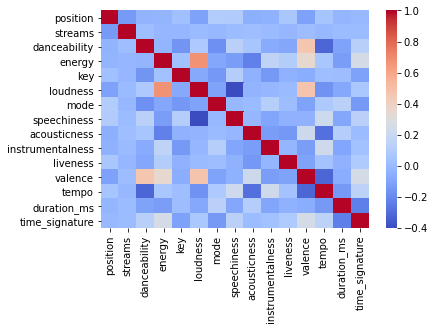

In [17]:
sns.heatmap(df4.corr(),cmap='coolwarm')

### Converting Categorical Columns into Numerical Columns

In [18]:
df5= df4.assign(nameid=(df4['name']).astype('category').cat.codes+1)
df6=df5.assign(artistid=(df5['artist']).astype('category').cat.codes+1)
df7=df6.assign(regionid=(df6['region']).astype('category').cat.codes+1)

In [19]:
df7.head()

,position,name,artist,streams,date,region,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,nameid,artistid,regionid
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,0.761,0.838,4.0,-3.073,...,0.4,0.0,0.176,0.71,93.974,222560.0,4.0,86,11,16
1,1,Reggaetón Lento (Bailemos),CNCO,16672,2017-01-02,ec,0.761,0.838,4.0,-3.073,...,0.4,0.0,0.176,0.71,93.974,222560.0,4.0,86,11,16
2,1,Reggaetón Lento (Bailemos),CNCO,17258,2017-01-03,ec,0.761,0.838,4.0,-3.073,...,0.4,0.0,0.176,0.71,93.974,222560.0,4.0,86,11,16
3,1,Reggaetón Lento (Bailemos),CNCO,18146,2017-01-04,ec,0.761,0.838,4.0,-3.073,...,0.4,0.0,0.176,0.71,93.974,222560.0,4.0,86,11,16
4,1,Reggaetón Lento (Bailemos),CNCO,17788,2017-01-05,ec,0.761,0.838,4.0,-3.073,...,0.4,0.0,0.176,0.71,93.974,222560.0,4.0,86,11,16


### Create Reference Table for Name, Artist and Region

In [20]:
name_ref=df7[['name','nameid']].drop_duplicates()
artist_ref=df7[['artist','artistid']].drop_duplicates()
region_ref=df7[['region','regionid']].drop_duplicates()

In [21]:
df7.drop(['name','artist','region'],axis=1,inplace=True)

### Split Datetime and Convert to Numerical Data Type

In [22]:
df7['year']=df7['date'].dt.year
df7['month']=df7['date'].dt.month
df7['day']=df7['date'].dt.day
df7.drop('date',axis=1,inplace=True)

In [23]:
df7.drop('position',axis=1,inplace=True)

In [24]:
df7.columns

Index(['streams', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'nameid',
       'artistid', 'regionid', 'year', 'month', 'day'],
      dtype='object')

### Standardize Features

In [25]:
col=['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']
scaler = preprocessing.StandardScaler().fit(df7[col])
df7[col]=scaler.transform(df7[col])
df7.head()

,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,nameid,artistid,regionid,year,month,day
0,19272,0.517125,1.266534,-0.34293,1.436151,-1.103904,-0.545514,1.297062,-0.202938,0.373639,0.829562,-0.938281,0.208192,0.156216,86,11,16,2017,1,1
1,16672,0.517125,1.266534,-0.34293,1.436151,-1.103904,-0.545514,1.297062,-0.202938,0.373639,0.829562,-0.938281,0.208192,0.156216,86,11,16,2017,1,2
2,17258,0.517125,1.266534,-0.34293,1.436151,-1.103904,-0.545514,1.297062,-0.202938,0.373639,0.829562,-0.938281,0.208192,0.156216,86,11,16,2017,1,3
3,18146,0.517125,1.266534,-0.34293,1.436151,-1.103904,-0.545514,1.297062,-0.202938,0.373639,0.829562,-0.938281,0.208192,0.156216,86,11,16,2017,1,4
4,17788,0.517125,1.266534,-0.34293,1.436151,-1.103904,-0.545514,1.297062,-0.202938,0.373639,0.829562,-0.938281,0.208192,0.156216,86,11,16,2017,1,5


In [26]:
df7.shape

(1152043, 20)

### Train-Valid-Test Split

> Train 70%, Valid 15%, Test 15%

In [27]:
y=df7['streams']
x=df7.drop('streams',axis=1)

In [28]:
x_tv,x_test,y_tv,y_test=train_test_split(x,y,test_size=0.15,random_state=101)


In [29]:
x_train,x_valid,y_train,y_valid=train_test_split(x_tv,y_tv,test_size=0.176471,random_state=101)
print(x_train.shape,x_valid.shape,x_test.shape,y_train.shape,y_valid.shape,y_test.shape)

(806429, 19) (172807, 19) (172807, 19) (806429,) (172807,) (172807,)


In [30]:
print('Shape')
print('Train Set:',x_train.shape,y_train.shape)
print('Valid Set:',x_valid.shape,y_valid.shape)
print('Test Set:',x_test.shape,y_test.shape)

Shape
Train Set: (806429, 19) (806429,)
Valid Set: (172807, 19) (172807,)
Test Set: (172807, 19) (172807,)


## Build Models with Random Forests & DNN

### Random Forest: model training, tuning, and evaluation

In [31]:
'''We need to check different values of max_features and n_estimators to test'''

features_estimators_list = list()
r2_list = list()

max_features = ['auto', 'sqrt', 'log2', None]
n_estimators = [10, 50, 100, 200]

for feature in max_features:
  for estimator in n_estimators:
    my_model = RandomForestRegressor(n_jobs = -1, n_estimators = estimator, max_features = feature, 
                                     bootstrap = True, random_state = 101)
    my_model.fit(x_train,y_train)
    r2_score = my_model.score(x_valid, y_valid)
    features_estimators_list.append(str(feature) + "+" + str(estimator))
    r2_list.append(r2_score)

In [32]:
eval_df = pd.DataFrame({"Max features + Num of estimators": features_estimators_list,
                        "R2 Score": r2_list})
eval_df

,Max features + Num of estimators,R2 Score
0,auto+10,0.994560
1,auto+50,0.994893
2,auto+100,0.994986
3,auto+200,0.995051
4,sqrt+10,0.982445
5,sqrt+50,0.987567
6,sqrt+100,0.988217
7,sqrt+200,0.988787
8,log2+10,0.982445
9,log2+50,0.987567


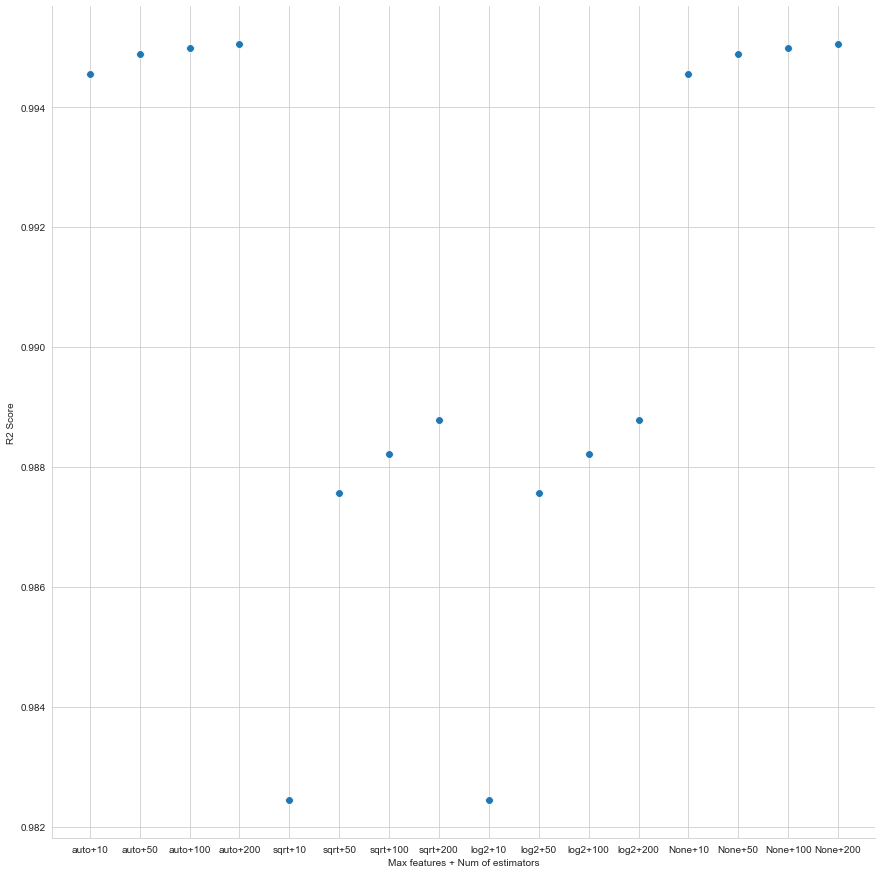

In [33]:
'''Plot max_features + n_estimators Vs validation set accuracy of the model'''

sns.set_style("whitegrid")
sns.pairplot(eval_df,x_vars = "Max features + Num of estimators",
             y_vars = "R2 Score",plot_kws = {'s': 60},height = 12.0)

In [34]:
'''Find the best max_features/n_estimators combination'''

r2_max = max(r2_list)
index = r2_list.index(r2_max)

print('Max R2 score:', r2_max)
print('Best max_features + n_estimators:', features_estimators_list[index])

Max R2 score: 0.9950511592029025
Best max_features + n_estimators: auto+200


In [35]:
'''max_features = Auto and n_estimators = 200 seems to give the best validation set R2 score.
So, let's turn to the test set and max_features = Auto, n_estimators = 200 for that'''

mod_RF = RandomForestRegressor(n_jobs = -1, n_estimators = 200, max_features = 'auto',
                               bootstrap = True, random_state = 101)
mod_RF.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=101)

In [38]:
'''Evaluate the model'''

y_predict_RF = mod_RF.predict(x_test)
mse_test_RF = mean_squared_error(y_test, y_predict_RF)
r2_test_RF = r2_score(y_test, y_predict_RF)

print('MSE:', mse_test_RF)
print('R2 score:', r2_test_RF)

MSE: 565755928.5226272
R2 score: 0.99483558071114


### DNN: model training, tuning, and evaluation

In [39]:
'''Function to create model, required for KerasRegressor'''

def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=19, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model

In [40]:
'''create model'''

model = KerasRegressor(build_fn=create_model, verbose=0)

In [41]:
'''define the grid search parameters'''

batch_size = [1000, 2000]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

In [42]:
'''summarize results，find the best batch_size/epochs combination'''

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -108427981619.199997 using {'batch_size': 2000, 'epochs': 100}
-111246080409.600006 (2702849430.185456) with: {'batch_size': 1000, 'epochs': 50}
-109886819532.800003 (3519392578.984913) with: {'batch_size': 1000, 'epochs': 100}
-108446885478.399994 (2426855004.636660) with: {'batch_size': 2000, 'epochs': 50}
-108427981619.199997 (2436732129.700740) with: {'batch_size': 2000, 'epochs': 100}


In [43]:
'''Build the deep neural network and compile the DNN'''

mod_DNN = Sequential()
mod_DNN.add(Dense(10, input_dim=19, kernel_initializer='normal', activation='relu'))
mod_DNN.add(Dense(6, kernel_initializer='normal', activation='relu'))
mod_DNN.add(Dense(1, kernel_initializer='normal', activation='relu'))

mod_DNN.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [44]:
'''Fit the DNN with train data'''

history = mod_DNN.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=2000)

Epoch 1/100
404/404 [==============================] - 1s 1ms/step - loss: 112692084736.0000 - mse: 112692084736.0000 - val_loss: 114303647744.0000 - val_mse: 114303647744.0000
Epoch 2/100
404/404 [==============================] - 0s 956us/step - loss: 112692011008.0000 - mse: 112692019200.0000 - val_loss: 114303647744.0000 - val_mse: 114303647744.0000
Epoch 3/100
404/404 [==============================] - 0s 950us/step - loss: 112692043776.0000 - mse: 112692043776.0000 - val_loss: 114303647744.0000 - val_mse: 114303647744.0000
Epoch 4/100
404/404 [==============================] - 0s 971us/step - loss: 112692043776.0000 - mse: 112692043776.0000 - val_loss: 114303647744.0000 - val_mse: 114303647744.0000
Epoch 5/100
404/404 [==============================] - 0s 954us/step - loss: 112692035584.0000 - mse: 112692035584.0000 - val_loss: 114303647744.0000 - val_mse: 114303647744.0000
Epoch 6/100
404/404 [==============================] - 0s 998us/step - loss: 112691978240.0000 - mse: 11269

Epoch 47/100
404/404 [==============================] - 0s 994us/step - loss: 112692051968.0000 - mse: 112692051968.0000 - val_loss: 114303647744.0000 - val_mse: 114303647744.0000
Epoch 48/100
404/404 [==============================] - 0s 961us/step - loss: 112692011008.0000 - mse: 112692011008.0000 - val_loss: 114303647744.0000 - val_mse: 114303647744.0000
Epoch 49/100
404/404 [==============================] - 0s 965us/step - loss: 112692043776.0000 - mse: 112692043776.0000 - val_loss: 114303647744.0000 - val_mse: 114303647744.0000
Epoch 50/100
404/404 [==============================] - 0s 967us/step - loss: 112692051968.0000 - mse: 112692051968.0000 - val_loss: 114303647744.0000 - val_mse: 114303647744.0000
Epoch 51/100
404/404 [==============================] - 0s 961us/step - loss: 112692011008.0000 - mse: 112692011008.0000 - val_loss: 114303647744.0000 - val_mse: 114303647744.0000
Epoch 52/100
404/404 [==============================] - 0s 951us/step - loss: 112692051968.0000 - ms

404/404 [==============================] - 0s 956us/step - loss: 112692092928.0000 - mse: 112692092928.0000 - val_loss: 114303647744.0000 - val_mse: 114303647744.0000
Epoch 93/100
404/404 [==============================] - 0s 969us/step - loss: 112692051968.0000 - mse: 112692051968.0000 - val_loss: 114303647744.0000 - val_mse: 114303647744.0000
Epoch 94/100
404/404 [==============================] - 0s 995us/step - loss: 112692019200.0000 - mse: 112692019200.0000 - val_loss: 114303647744.0000 - val_mse: 114303647744.0000
Epoch 95/100
404/404 [==============================] - 0s 949us/step - loss: 112692035584.0000 - mse: 112692035584.0000 - val_loss: 114303647744.0000 - val_mse: 114303647744.0000
Epoch 96/100
404/404 [==============================] - 0s 949us/step - loss: 112692043776.0000 - mse: 112692043776.0000 - val_loss: 114303647744.0000 - val_mse: 114303647744.0000
Epoch 97/100
404/404 [==============================] - 0s 947us/step - loss: 112692084736.0000 - mse: 1126920847

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


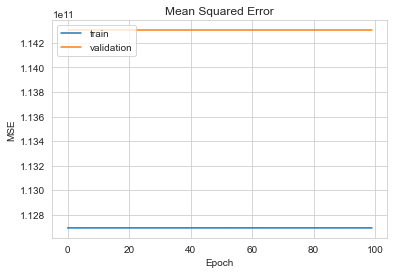

In [45]:
'''Plot epoch vs training set MSE and validation set MSE'''

print(history.history.keys())

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [46]:
'''Evaluate the model'''

y_predict_DNN = mod_DNN.predict(x_test)
mse_DNN = mean_squared_error(y_test, y_predict_DNN)
r2_DNN = r2_score(y_test, y_predict_DNN)

print('MSE:', mse_DNN)
print('R2 score:', r2_DNN)

MSE: 116658165397.24767
R2 score: -0.0648968030327397


## Compare the results of Random Forests & DNN

In [48]:
print('Random Forests Model:')
print('R2 score:', r2_test_RF)
print('MSE:', mse_test_RF)

print('Neural Networks Model:')
print('R2 score:', r2_DNN)
print('MSE:', mse_DNN)

Random Forests Model:
R2 score: 0.99483558071114
MSE: 565755928.5226272
Neural Networks Model:
R2 score: -0.0648968030327397
MSE: 116658165397.24767
